In [13]:
#Google drive authentication Code

!pip install -U -q PyDrive
!pip install gensim
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Load a file by ID and create local file.
#(**********************Steps to Get File ID******************************)
#Upload the dataset on google drive and then go and click on the dataset to scroll to the option which says get shareable link

#The link will be copied to the clipboard paste it to the notepad and then
#like : https://drive.google.com/open?id=1DHkNolpOVuE76ZL2bTHY_LDwIC126XFn
#in this link copy the the string after id = and paste it in the code down here to get your data exported in the google collaboratory environment

##****************************************************************************************************************************
#Loading Book 1 of Game of thrones
downloaded = drive.CreateFile({'id':'1PSKtemh6nhixOpUGsPqffKWwfwaJBRF5'}) # replace fileid with Id of file you want to access represented by long string in single quotes
downloaded.GetContentFile('data_set.csv') # now you can use export.csv share



##MUSIC SIGNAL ANALYSIS : PART I

In [14]:
#importing libraries
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn,IPython.display as ipd
import matplotlib.style as ms
ms.use('seaborn-muted')
!pip install -U config
!pip install -U tqdm
import config
%matplotlib inline

Requirement already up-to-date: config in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: tqdm in /usr/local/lib/python2.7/dist-packages


In [0]:
float_formatter = lambda x: "%.4f" % x
numpy.set_printoptions(formatter={'float_kind':float_formatter})


In [0]:
#fetching the sound files mentioned below from drive
#the songs are from GTZAN dataset
downloaded1 = drive.CreateFile({'id':'1kVjvo7oF3CUS72F2LL9Wm90X1kigrik3'}) # replace fileid with Id of file you want to access represented by long string in single quotes
downloaded1.GetContentFile('metal.00001.wav')

downloaded2 = drive.CreateFile({'id':'1kZBXiZkGz_A5hWbQxfJEoVMis4DAC7qq'}) # replace fileid with Id of file you want to access represented by long string in single quotes
downloaded2.GetContentFile('classical.00001.wav')



sampling_rate=44100
# For a duration of 6 secs

x_metal,sr=librosa.load("metal.00001.wav",sr=sampling_rate,mono=True,duration=6.0)
x_classical,sr=librosa.load("classical.00001.wav",sr=sampling_rate,mono=True,duration=6.0)

In [17]:
print("Overview of the array of samples for Metal song:(size={})\n{}:\n ".format(x_metal.shape,x_metal))
print("Overview of the array of samples for Classical song:(size={})\n{}".format(x_classical.shape,x_classical))

Overview of the array of samples for Metal song:(size=(264600,))
[0.1128 0.1313 0.1230 ... 0.0083 -0.0155 -0.0131]:
 
Overview of the array of samples for Classical song:(size=(264600,))
[-0.0112 -0.0107 -0.0023 ... -0.0019 -0.0003 0.0003]


* We got 264600 samples with 44.1 KHz sampling rate.
* We got an array of samples for each song
* Every member of the array is a sample from signal.

Text(0.5,1,u'Clasical')

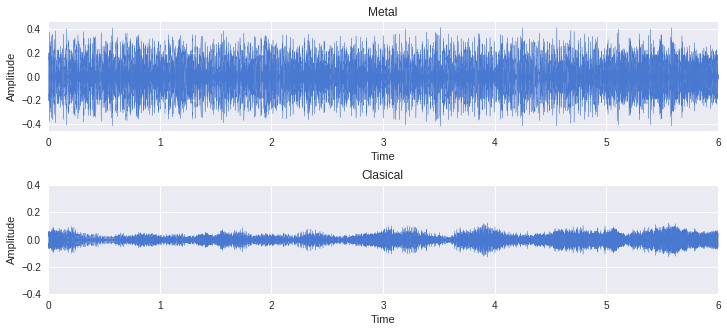

In [19]:
#Plotting the waveplot.
#Waveplot - Time Domain
import librosa.display

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2, 1, 1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x_metal,sampling_rate)
plt.title('Metal')

plt.subplot(2, 1, 2)
plt.ylim(-0.4,0.4)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x_classical,sampling_rate)
plt.title('Clasical')

In [21]:
#playing the songs
ipd.Audio(x_metal, rate=sampling_rate)


In [23]:
#playing the songs
ipd.Audio(x_classical, rate=sampling_rate)



* Waveplots give time and amplitude information only.

* So Let's proceed to Fourier Transform

 ** It's not a good way to analyze a complete song in time.**
* In audio processing, it is common to operate on one frame at a time using a constant frame size and hop size. Frames are typically chosen to be 10 to 100 ms in duration.
* We compute features from frames.

 - Frame Length: The number of samples in a frame.
 - Hop Length: The length between frames. (in samples)
 
 * We use 2048 frame length and 512 hop length for this work.
* Also these values are the deafults for Librosa.

In [0]:
hop_size=512
frame_size=2048


In [27]:
#Segmentation
F=librosa.util.frame(x_metal,frame_length=frame_size,hop_length=hop_size)
x,y=F.shape

print("Number of frames={} with frame size={} for Metal song".format(y,x))
print("Total number of samples= {}\n".format(y*x+hop_size))
print(F)

F2=librosa.util.frame(x_classical,frame_length=frame_size,hop_length=hop_size)
x2,y2=F2.shape

print("\nNumber of frames={} with frame size={} for Classical song".format(y2,x2))
print("Total number of samples= {}\n".format(y2*x2+hop_size))
print(F2)

Number of frames=513 with frame size=2048 for Metal song
Total number of samples= 1051136

[[0.1128 -0.1044 -0.0070 ... 0.0112 -0.0342 0.1927]
 [0.1313 -0.1331 -0.0777 ... 0.0223 -0.0132 0.2088]
 [0.1230 -0.1823 -0.1516 ... 0.0343 -0.0106 0.2193]
 ...
 [-0.1169 -0.1003 -0.0177 ... -0.0658 -0.0913 0.0701]
 [-0.0488 -0.1307 -0.0167 ... -0.0620 -0.0962 0.0835]
 [0.0053 -0.1749 0.0111 ... -0.0288 -0.0796 0.0916]]

Number of frames=513 with frame size=2048 for Classical song
Total number of samples= 1051136

[[-0.0112 -0.0560 0.0450 ... 0.0094 -0.0164 0.0150]
 [-0.0107 -0.0502 0.0346 ... 0.0088 -0.0167 0.0126]
 [-0.0023 -0.0441 0.0277 ... 0.0084 -0.0170 0.0085]
 ...
 [-0.0388 0.0364 -0.0498 ... 0.0263 0.0136 -0.0054]
 [-0.0558 0.0331 -0.0637 ... 0.0253 0.0129 -0.0011]
 [-0.0679 0.0284 -0.0720 ... 0.0251 0.0123 0.0037]]


* How can we do a segmentation in other way ?
* If we can find the most valuable points in a signal and do segmentation after that points we can have valuable information with less frames.
** ONSET DETECTION **
* Automatic detection of musical events in an audio signal is one of the most fundamental tasks in music information retrieval. Here, we will show how to detect an onset, the very instant that marks the beginning of the transient part of a sound, or the earliest moment at which a transient can be reliably detected.

In [30]:
#Onset Detection
onset_frames = librosa.onset.onset_detect(x_metal, sr=sampling_rate,hop_length=hop_size)
onset_times = librosa.frames_to_time(onset_frames)
x=onset_frames.size
print("Number of detected onsets for Metal song={}".format(x))
print(onset_frames)


onset_frames2 = librosa.onset.onset_detect(x_classical, sr=sampling_rate,hop_length=hop_size)
onset_times2 = librosa.frames_to_time(onset_frames2)
x2=onset_frames2.size
print("\nNumber of detected onsets for Classical song={}".format(x2))
print(onset_frames2)

Number of detected onsets for Metal song=61
[  3  11  20  36  42  46  53  61  69  79  85  93 101 112 119 128 135 152
 156 168 185 194 201 211 219 224 227 234 252 258 267 277 284 298 309 317
 324 333 342 350 359 366 376 383 391 394 399 407 415 432 441 449 457 466
 470 473 482 490 502 513 516]

Number of detected onsets for Classical song=58
[  5  14  23  27  34  50  68  75  90  94  98 109 113 121 137 149 158 162
 179 184 193 198 202 210 223 230 235 243 254 266 271 289 295 298 311 333
 358 362 376 392 397 400 403 411 420 424 431 434 441 449 454 463 468 473
 477 488 499 511]


Text(0.5,1,u'Classical')

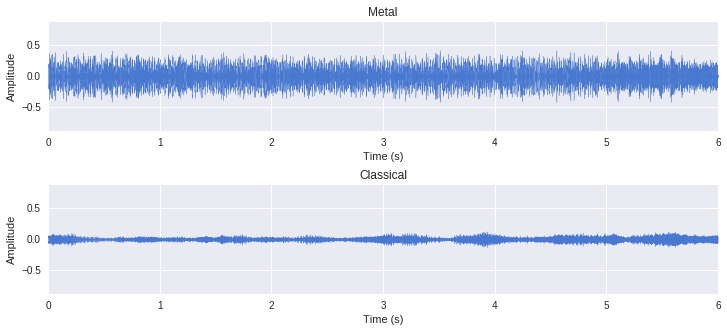

In [31]:
#Plotting the wave with detected onsets to visualize
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
librosa.display.waveplot(x_metal, sr=sampling_rate)
plt.vlines(onset_times*1000, -0.8, 0.79, color='r', alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Metal')

plt.subplot(2,1,2)
librosa.display.waveplot(x_classical, sr=sampling_rate)
plt.vlines(onset_times2*1000, -0.8, 0.79, color='r', alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Classical')

In [32]:
#lets create a click sound and add it to each onset to hear it
clicks = librosa.clicks(frames=onset_frames, sr=sampling_rate, length=len(x_metal))
ipd.Audio(x_metal + clicks, rate=sampling_rate)

In [34]:
#Similarly on the second one
clicks = librosa.clicks(frames=onset_frames2, sr=sampling_rate, length=len(x_classical))
ipd.Audio(x_classical + clicks, rate=sampling_rate)

## Onset Detection is the most important feature detection stage in audio signal processing.

## Let's dive into Fourier Transform


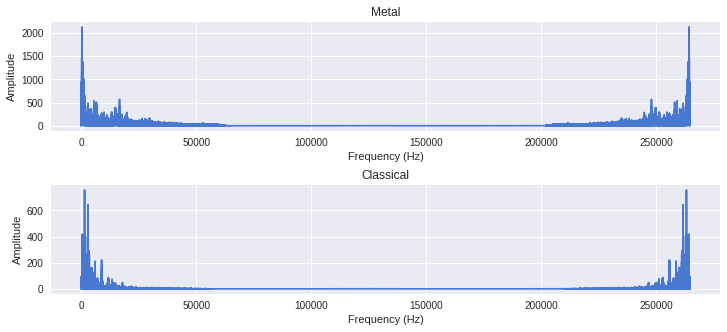

In [35]:
#Computing FFT for each song
# Fourier Transform and Spectrum

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
FFT_Metal=scipy.fft(x_metal)
FFT_Metal_Mag=numpy.absolute(FFT_Metal)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title('Metal')
plt.plot(FFT_Metal_Mag)

plt.subplot(2,1,2)
FFT_Classical=scipy.fft(x_classical)
FFT_Classical_Mag=numpy.absolute(FFT_Classical)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title('Classical')
plt.plot(FFT_Classical_Mag)

* We have frequency information of signals.
* But we lost information about time.
* How can we get information about time and frequency at the same time ?
* **Short-Time Fourier Transform**
 - Musical signals are highly non-stationary, i.e., their statistics change over time. It would be rather meaningless to compute a spectrum over an entire 10-minute song.
 - With STFT, we break up the signal into dicsrete windows.
 - We use a window function such as Polynomial, Hanning, Hamming...
 - Each signal within a window is a stationary signal.
 - After we apply FFT over each window we obtain Spectogram of the signal.
 - **_Window Size_:** Number of samples in each window.

/usr/local/lib/python2.7/dist-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


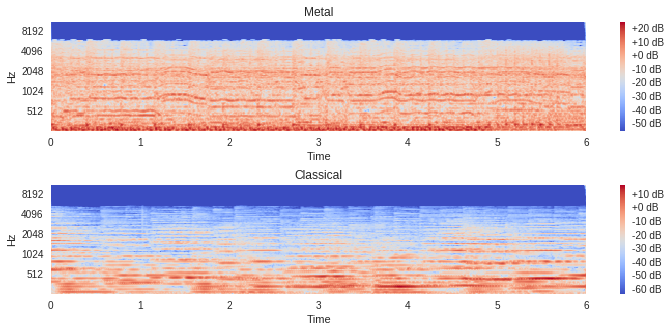

In [36]:
#Computing STFTs of the songs
#Short-Time Fourier Transform and Spectogram

window_size=2048

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
S = librosa.feature.melspectrogram(x_metal, sr=sampling_rate, n_fft=window_size)
logS = librosa.logamplitude(S)
plt.title('Metal')
librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2,1,2)
S2 = librosa.feature.melspectrogram(x_classical, sr=sampling_rate, n_fft=window_size)
logS2 = librosa.logamplitude(S2)
plt.title('Classical')
librosa.display.specshow(logS2, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

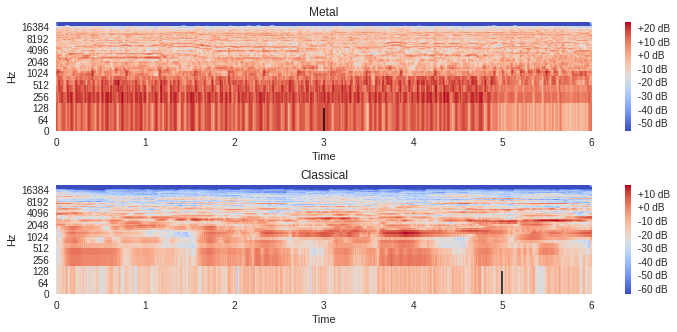

In [37]:
#Adding onset as calculated above to each of the songs and plotting the STFT
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
S = librosa.feature.melspectrogram(x_metal, sr=sampling_rate, n_fft=window_size)
logS = librosa.logamplitude(S)
plt.title('Metal')
librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='log')
plt.vlines(onset_frames, 0, logS.shape[0], color='k', alpha=0.8)
plt.colorbar(format='%+2.0f dB')

plt.subplot(2,1,2)
S2 = librosa.feature.melspectrogram(x_classical, sr=sampling_rate, n_fft=window_size)
logS2 = librosa.logamplitude(S2)
plt.title('Classical')
librosa.display.specshow(logS2, sr=sampling_rate, x_axis='time', y_axis='log')
plt.vlines(onset_frames2, 0, logS.shape[0], color='k', alpha=0.8)
plt.colorbar(format='%+2.0f dB')

* **Constant-Q Transform**
 - If we want to obtain information about pitch values we use Constant-Q Transform.
 
 Let's obtain Chromogram for each of the songs
 

/usr/local/lib/python2.7/dist-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/usr/local/lib/python2.7/dist-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/usr/local/lib/python2.7/dist-packages/librosa/core/constantq.py:277: DeprecationWarning: Real-valued CQT (real=True) is deprecated in 0.4.2. The `real` parameter will be removed in 0.6.0.Use np.abs(librosa.cqt(...)) instead of real=True to maintain forward compatibility.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/librosa/core/const

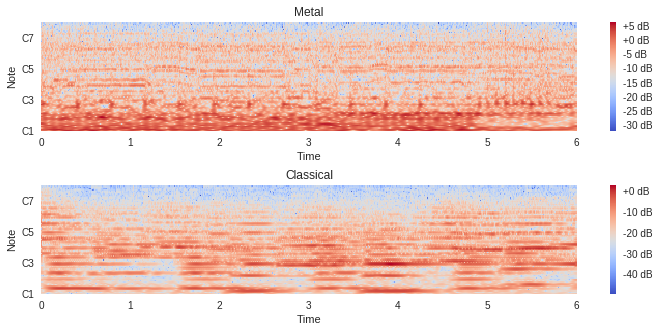

In [38]:
#Costant-Q Transform and Chromagram

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
C = librosa.cqt(x_metal, sr=sampling_rate,hop_length=hop_size,real=False,fmin=librosa.note_to_hz('C2'))
logC = librosa.logamplitude(C)
plt.title('Metal')
librosa.display.specshow(logC, sr=sampling_rate, x_axis='time', y_axis='cqt_note',cmap='coolwarm',)
plt.colorbar(format='%+2.0f dB')

plt.subplot(2,1,2)
C2 = librosa.cqt(x_classical, sr=sampling_rate,hop_length=hop_size,real=False,fmin=librosa.note_to_hz('C2'))
logC2 = librosa.logamplitude(C2)
plt.title('Classical')
librosa.display.specshow(logC2, sr=sampling_rate, x_axis='time', y_axis='cqt_note',cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

Performing Constant Q Transform with Pitch classes

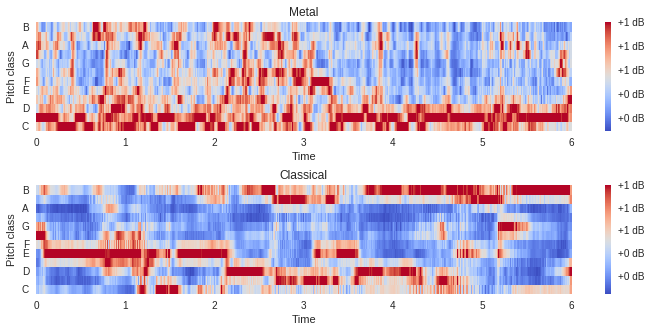

In [39]:
#Canstant-Q Transform and Chromagram with Pitch Classes

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
C = librosa.feature.chroma_cqt(x_metal, sr=sampling_rate,hop_length=hop_size,fmin=librosa.note_to_hz('C2'))
plt.title('Metal')
librosa.display.specshow(C, sr=sampling_rate, x_axis='time', y_axis='chroma',cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2,1,2)
C2 = librosa.feature.chroma_cqt(x_classical, sr=sampling_rate,fmin=librosa.note_to_hz('C2'))
plt.title('Classical')
librosa.display.specshow(C2, sr=sampling_rate, x_axis='time', y_axis='chroma',cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')